In [1]:
# Import Dependencies

# Importing the required libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
train = pd.read_csv("Resources/train.csv")
test = pd.read_csv("Resources/test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
##Exploratory Data Analysis

In [6]:
test.shape

(1459, 80)

In [7]:
train.shape

(1460, 81)

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


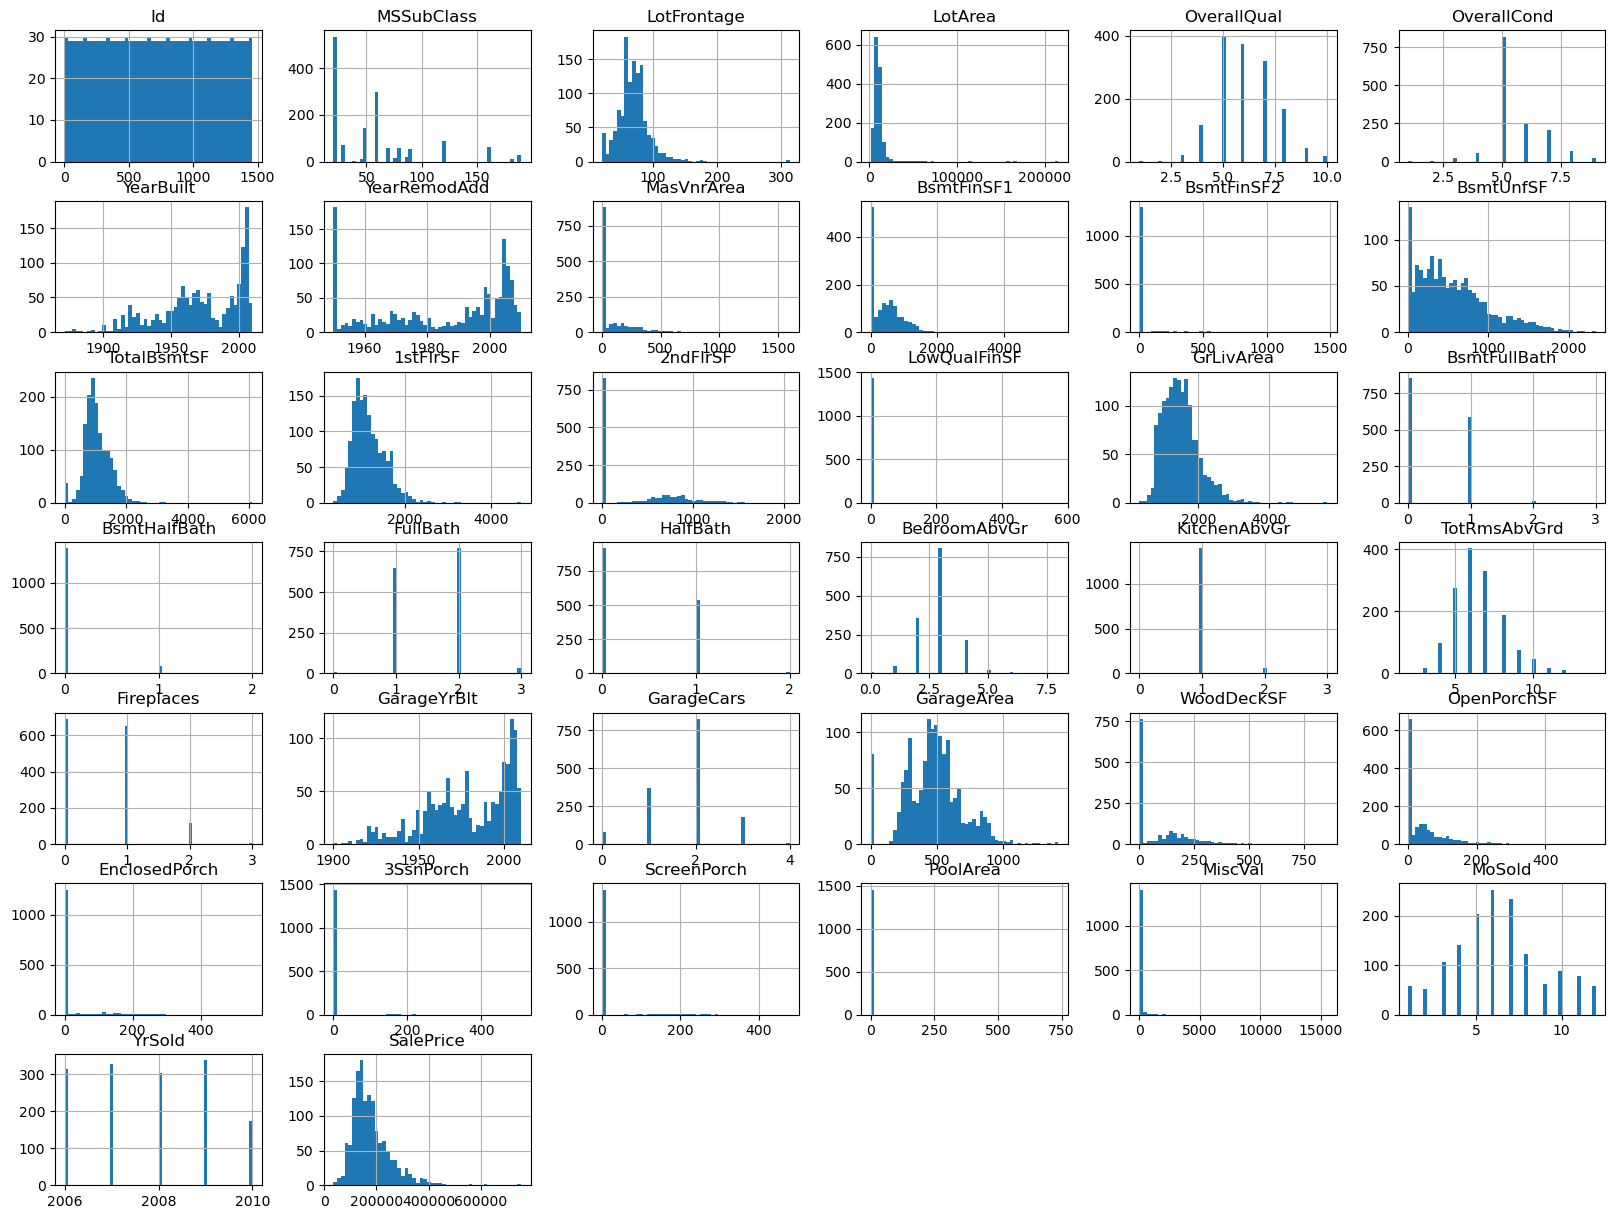

In [12]:
train.hist(bins=50, figsize=(20,15))
plt.show()

In [13]:
corr_matrix = train.corr()

In [14]:
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

The correlation coefficient ranges from –1 to 1.
When it is close to 1, it means that there is a strong positive correlation;
for example, the median Sales Price tends to go up when the Overall Quality goes up.

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='BsmtFinSF1', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='LotFrontage', ylabel='Sale

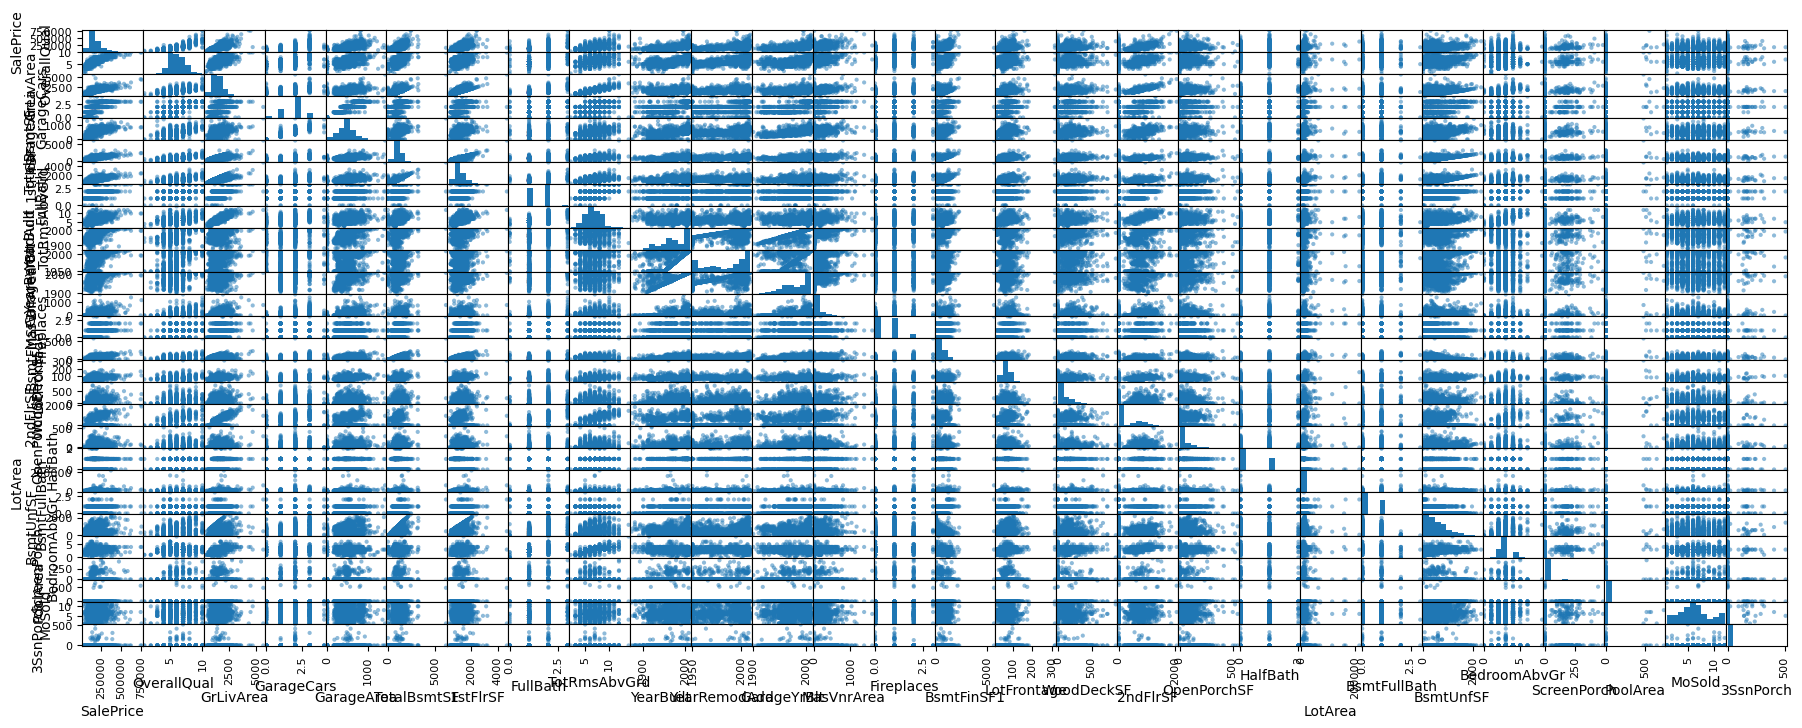

In [15]:
from pandas.plotting import scatter_matrix
attributes = ["SalePrice", "OverallQual", "GrLivArea",
                  "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", 
                  "FullBath", "TotRmsAbvGrd", "YearBuilt",
                 "YearRemodAdd", "GarageYrBlt", 
                  "MasVnrArea", "Fireplaces","BsmtFinSF1", 
                  "LotFrontage", "WoodDeckSF", "2ndFlrSF",
                 "OpenPorchSF", "HalfBath", 
                  "LotArea","BsmtFullBath","BsmtUnfSF", "BedroomAbvGr", "ScreenPorch", 
                  "PoolArea", "MoSold", "3SsnPorch"]

scatter_matrix(train[attributes], figsize=(22, 8))

In [16]:
housing = train.drop("SalePrice", axis=1)
housing_label = train["SalePrice"]

In [17]:
housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [18]:
housing_label

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [19]:
# Dropping features whose attributes are >1000
features = []
nullValues = []
for i in housing:
    if (housing.isna().sum()[i])>1000 and i!='SalePrice':
        features.append(i)
        nullValues.append(housing.isna().sum()[i])
print(features)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [20]:
housing = housing.dropna(axis=1, how='any', thresh = 1000)

In [21]:
housing.shape

(1460, 75)

In [22]:
num_data = housing.select_dtypes(include = ['float', 'int64'])
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ='median') 
imputer.fit(num_data)
imputer.statistics_
num_data.median().values

array([7.3050e+02, 5.0000e+01, 6.9000e+01, 9.4785e+03, 6.0000e+00,
       5.0000e+00, 1.9730e+03, 1.9940e+03, 0.0000e+00, 3.8350e+02,
       0.0000e+00, 4.7750e+02, 9.9150e+02, 1.0870e+03, 0.0000e+00,
       0.0000e+00, 1.4640e+03, 0.0000e+00, 0.0000e+00, 2.0000e+00,
       0.0000e+00, 3.0000e+00, 1.0000e+00, 6.0000e+00, 1.0000e+00,
       1.9800e+03, 2.0000e+00, 4.8000e+02, 0.0000e+00, 2.5000e+01,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       6.0000e+00, 2.0080e+03])

In [24]:
X = imputer.transform(num_data)
num_data =pd.DataFrame(X , columns = num_data.columns)
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   OverallQual    1460 non-null   float64
 5   OverallCond    1460 non-null   float64
 6   YearBuilt      1460 non-null   float64
 7   YearRemodAdd   1460 non-null   float64
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   float64
 10  BsmtFinSF2     1460 non-null   float64
 11  BsmtUnfSF      1460 non-null   float64
 12  TotalBsmtSF    1460 non-null   float64
 13  1stFlrSF       1460 non-null   float64
 14  2ndFlrSF       1460 non-null   float64
 15  LowQualFinSF   1460 non-null   float64
 16  GrLivArea      1460 non-null   float64
 17  BsmtFullBath   1460 non-null   float64
 18  BsmtHalf

In [28]:
cat_data = housing.select_dtypes(include = ['object'])
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1452 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

In [29]:
cat_data.shape

(1460, 38)

In [31]:
# Label encoding multiple columns
from sklearn.preprocessing import LabelEncoder
encoded_data = pd.DataFrame(columns = cat_data.columns , 
                       data = LabelEncoder().fit_transform(cat_data.values.flatten()).reshape(cat_data.shape))

In [32]:
housing_prepared = pd.concat([num_data , encoded_data], axis = 1)

In [33]:
housing_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   OverallQual    1460 non-null   float64
 5   OverallCond    1460 non-null   float64
 6   YearBuilt      1460 non-null   float64
 7   YearRemodAdd   1460 non-null   float64
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   float64
 10  BsmtFinSF2     1460 non-null   float64
 11  BsmtUnfSF      1460 non-null   float64
 12  TotalBsmtSF    1460 non-null   float64
 13  1stFlrSF       1460 non-null   float64
 14  2ndFlrSF       1460 non-null   float64
 15  LowQualFinSF   1460 non-null   float64
 16  GrLivArea      1460 non-null   float64
 17  BsmtFullBath   1460 non-null   float64
 18  BsmtHalf

In [91]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories ='auto')
housing_cat_1hot = enc.fit_transform(cat_data)
housing_cat_1hot

<1460x245 sparse matrix of type '<class 'numpy.float64'>'
	with 55480 stored elements in Compressed Sparse Row format>

In [92]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self , feature_names):
        self._feature_names = feature_names
        
    def fit(self, X, y = None):
        return self
        
    def transform(self, X , y =None):
        return X[self._feature_names]

In [93]:
### Create a pipeline  then change the label encoder into one hot encoders
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

num_attributes = list(num_data)
categorical_atrributes = list(cat_data)

num_pipeline = Pipeline( steps = [
    ('selector', FeatureSelector(num_attributes)),
    ('imputer', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler()),
])
categorical_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='most_frequent')),
('imput', OneHotEncoder(handle_unknown='ignore'))
])


full_pipeline = FeatureUnion(transformer_list = [
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', categorical_transformer)
])

In [90]:
# MACHINE LEARNING MODELS

In [36]:
from sklearn.tree import DecisionTreeRegressor 

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_label)

DecisionTreeRegressor()

In [37]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_label, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
# USING CROSSVALIDATION

In [40]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_label,
                             scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)


In [48]:
    def display_scores(scores):
    
        print("Scores:", scores)
        print("Mean:", scores.mean())
        print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [34658.77093057 41209.37645282 33198.47264559 41936.32282606
 41600.77231172 34194.92517273 32370.95837458 40390.53160807
 71274.7309178  38390.47643658]
Mean: 40922.5337676507
Standard deviation: 10708.904104420799


In [ ]:
# The Decision Tree has a score of approximately 40923

In [49]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_label)

RandomForestRegressor()

In [50]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_rmse = mean_squared_error(housing_label, housing_predictions)
forest_rmse = np.sqrt(forest_rmse)
forest_rmse

11161.074144997256

In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg, housing_prepared, housing_label,
                             scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [54]:
def display_scores(scores):
    
        print("Scores:", scores)
        print("Mean:", scores.mean())
        print("Standard deviation:", scores.std())


display_scores(forest_rmse_scores)

Scores: [24885.74050788 26283.82371075 21922.55930818 38413.80901708
 32353.76282325 26155.84776622 23026.67439288 23709.85104148
 41310.91552672 27804.00147036]
Mean: 28586.698556481064
Standard deviation: 6303.164334931763


In [ ]:
# The Random Forest Regressor has a score of approximately 40923

In [95]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(housing_prepared, housing_label)


GradientBoostingRegressor()

In [96]:
housing_predictions = gbr.predict(housing_prepared)
gbr_rmse = mean_squared_error(housing_label, housing_predictions)
gbr_rmse = np.sqrt(gbr_rmse)
gbr_rmse

15116.330862088416

In [97]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gbr, housing_prepared, housing_label,
                             scoring="neg_mean_squared_error", cv=10)
gbr_rmse_scores = np.sqrt(-scores)

In [98]:
def display_scores(scores):
    
        print("Scores:", scores)
        print("Mean:", scores.mean())
        print("Standard deviation:", scores.std())


display_scores(gbr_rmse_scores)

Scores: [20767.90949115 23851.40076225 19871.70500963 37560.20805687
 28774.90248672 24900.45928513 24471.84075109 21705.26160154
 25788.34744625 25688.99954555]
Mean: 25338.103443618653
Standard deviation: 4781.581635323917


In [ ]:
# The Gradient Boosting Regressor has a score of approximately 25338. Thus making this model our best model

In [ ]:
# Finetuning Model Using Grid Search

In [72]:
import time
from sklearn.model_selection import GridSearchCV

def model_pipeline(model, param_grid, scoring):
    grid_search = GridSearchCV(
        estimator=model, param_grid=param_grid, scoring=scoring, cv=5
    )

    # Fit model & Time the process for training the model
    print("running model")
    start_time = time.process_time()

    grid_search.fit(housing_prepared, housing_label)

    # End of fit time
    print(time.process_time() - start_time, "Seconds")
    print("finished running model")
    return grid_search


# Generate results of best run


def plot_mean_scores(grid_search, col, x, y, name):

    Results = pd.DataFrame(grid_search.cv_results_)
    Results_Best = Results.loc[Results.rank_test_score == 1]

    # Initialize a grid of plots
    sns.set(font_scale=1.5)
    sns.set_style("darkgrid")
    col = col
    for col in col:
        grid = sns.FacetGrid(
            Results,
            col=col,
            hue="rank_test_score",
            palette="tab20c",
            legend_out=False,
            col_wrap=5,
            height=15,
        )

        # Draw a horizontal line to show the starting point
        grid.map(plt.axhline, y=0, ls=":", c=".5")

        # Draw marker on plot and decide what parameters to plot
        grid.map(sns.scatterplot, x, y, marker="x", s=200)

        # Adjust the arrangement of the plots
        grid.fig.tight_layout(w_pad=1)

        # Add legend to gird
        grid.add_legend()

    grid.savefig(name)

running model
0.38381899999998836 Seconds
finished running model


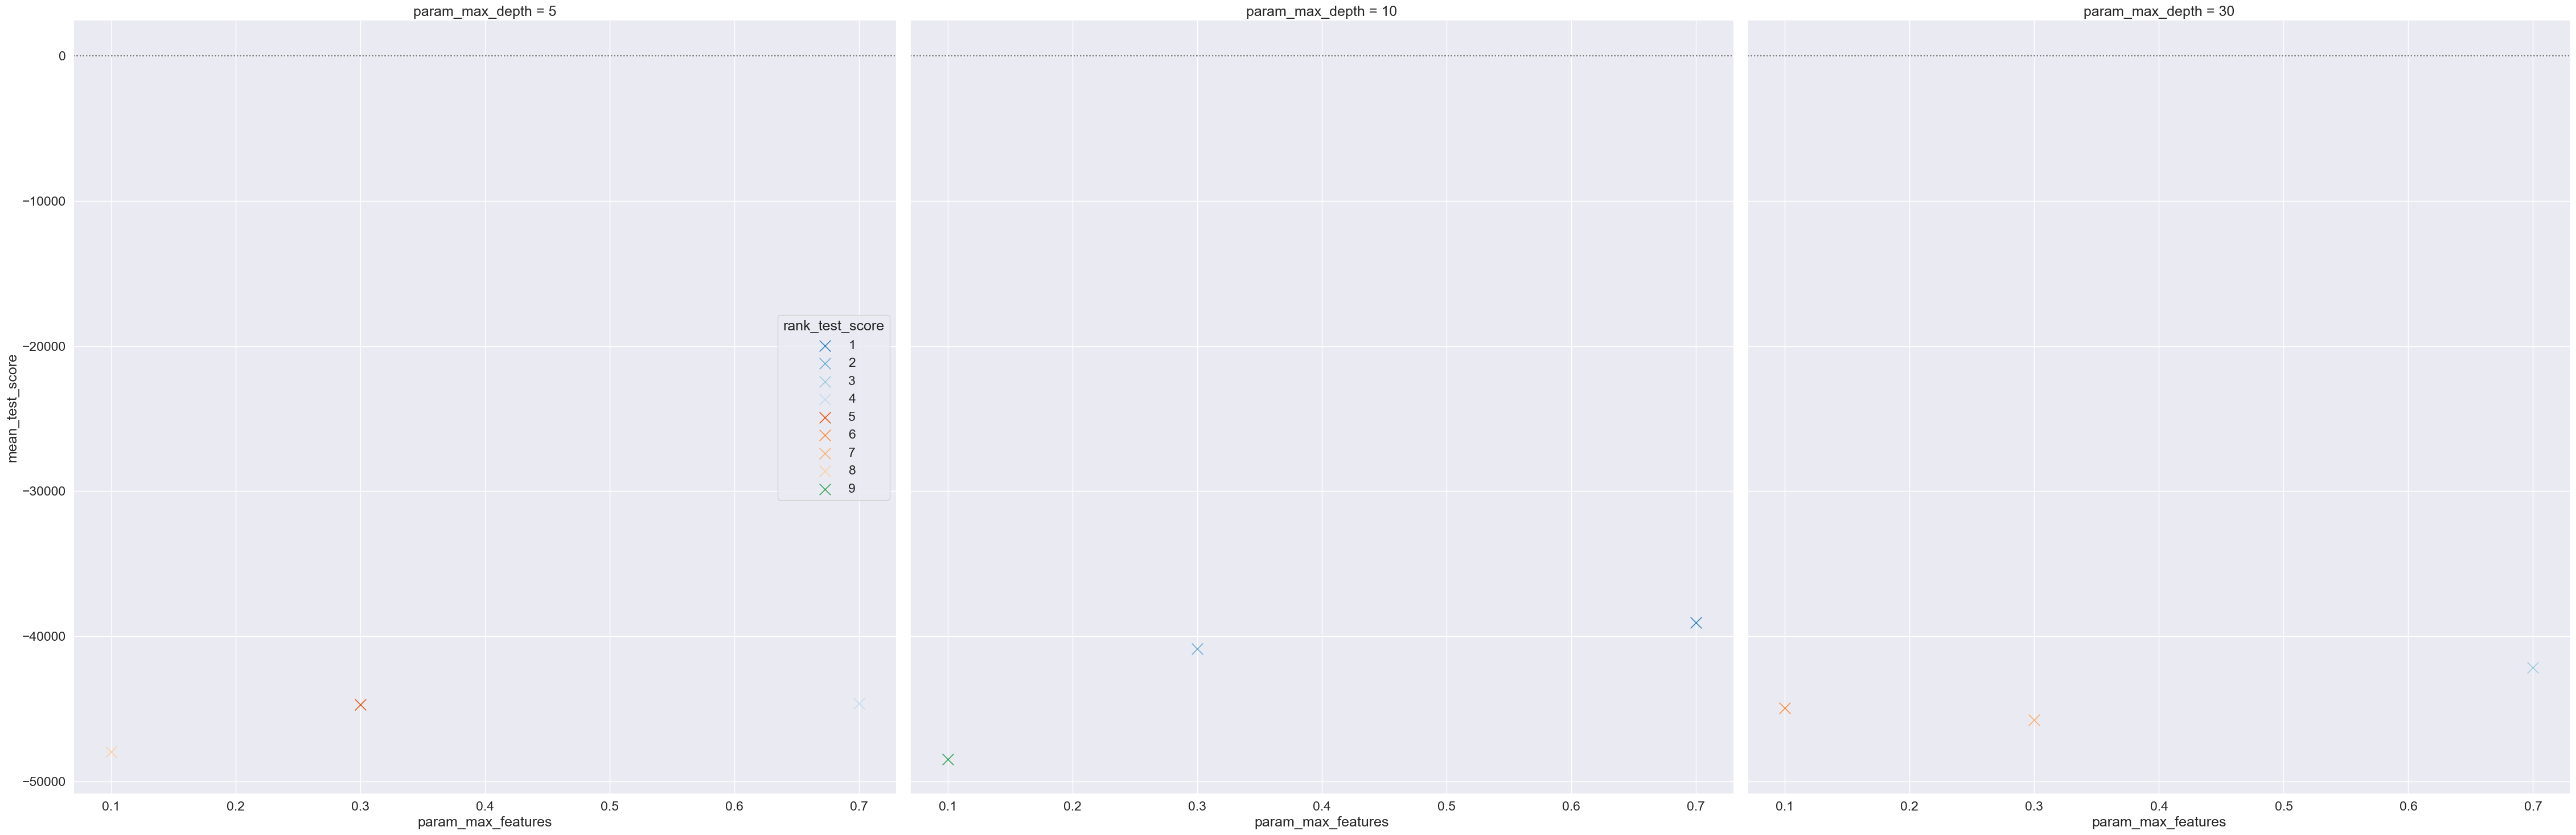

In [74]:
# Modelling

# Build a decision tree
# Set paramters for Grid Search CV
param_grid = {
    "max_depth": [5, 10, 30],
    "max_features": [0.1, 0.3, 0.7],
}
tree_reg = DecisionTreeRegressor(criterion="mse", random_state=0)

grid_search = model_pipeline(tree_reg, param_grid, "neg_root_mean_squared_error")
plot_mean_scores(
    grid_search,
    ["param_max_depth"],
    "param_max_features",
    "mean_test_score",
    "DecisionTree",
)

running model
40.074938 Seconds
finished running model


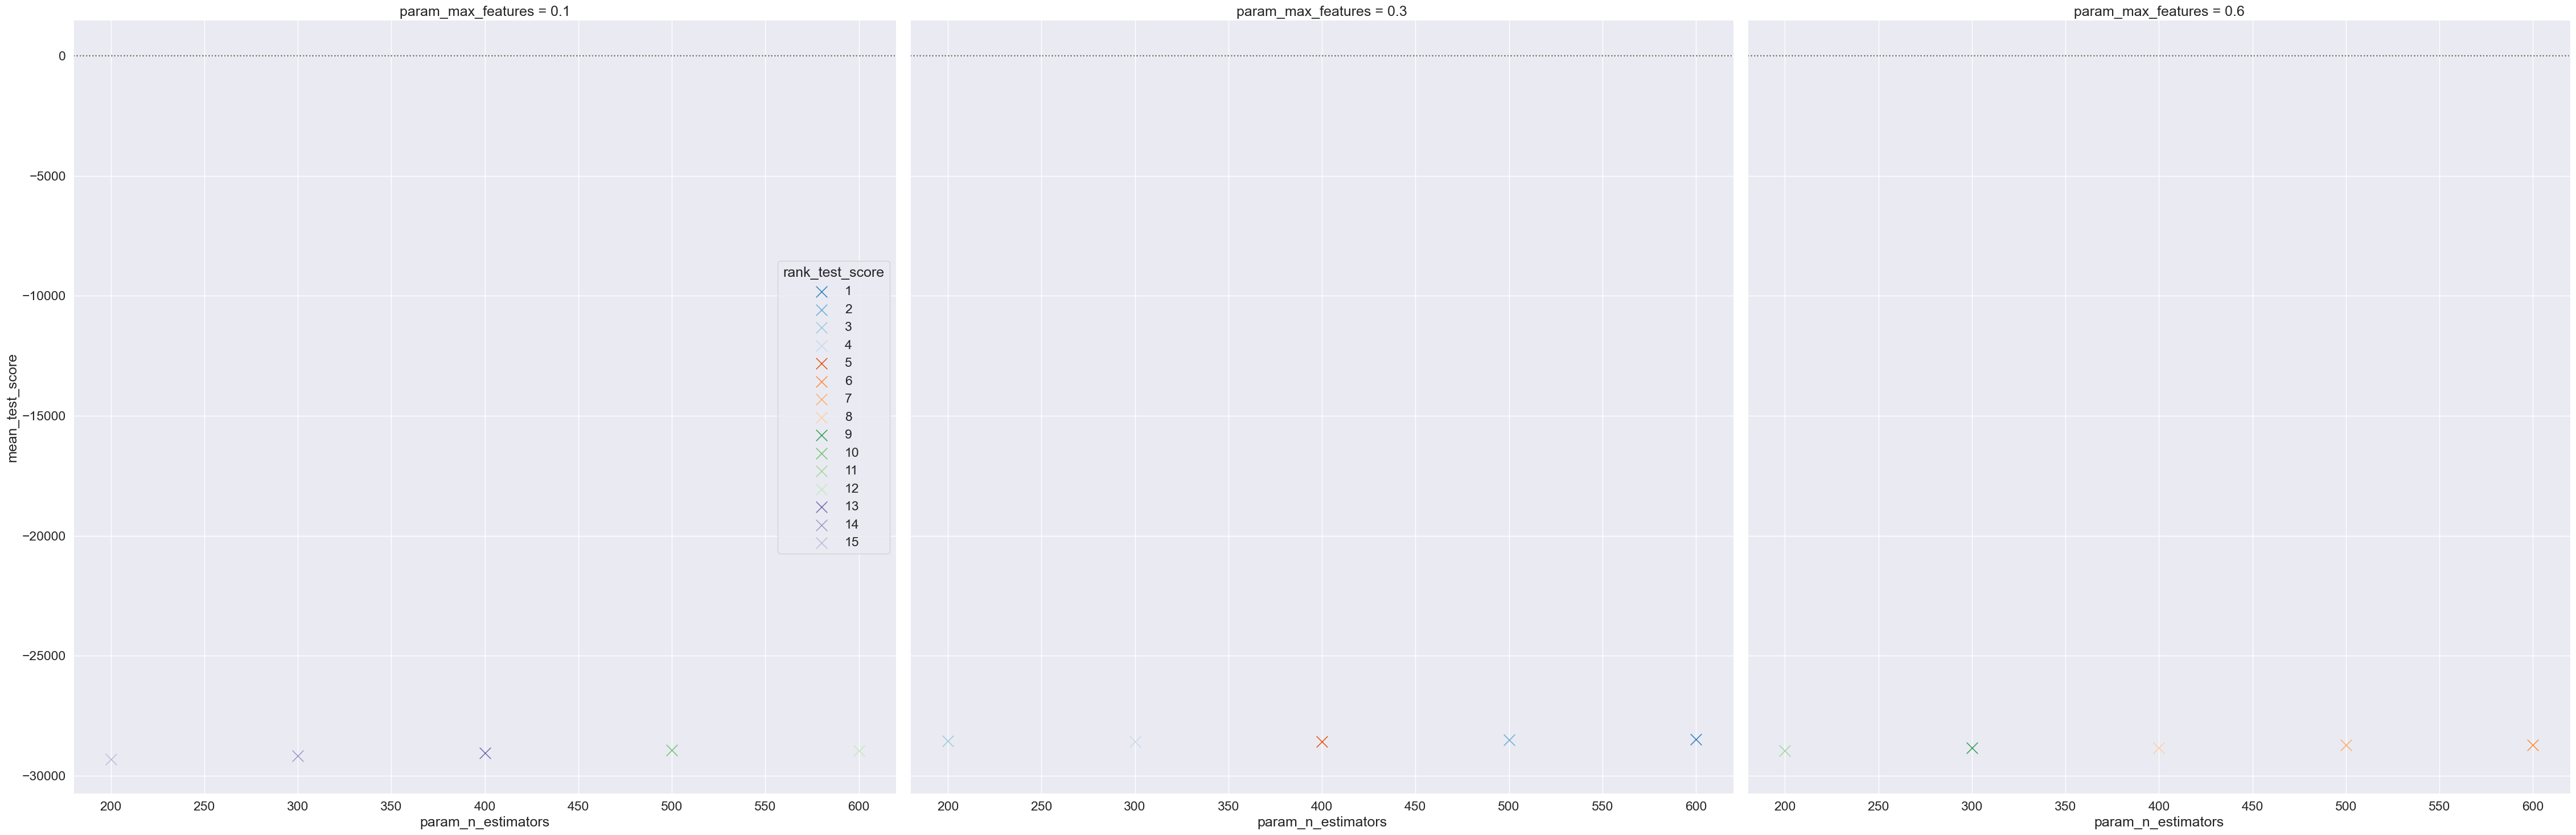

In [75]:
# Set paramters for Grid Search
param_grid = {
    "n_estimators": [200, 300, 400, 500, 600],
    "max_features": [0.1, 0.3, 0.6],
}
# Initialise the random forest model
forest_rmse = RandomForestRegressor(n_jobs=-1, random_state=0, bootstrap=True)

grid_search = model_pipeline(forest_rmse, param_grid, "neg_root_mean_squared_error")
plot_mean_scores(
    grid_search,
    ["param_max_features"],
    "param_n_estimators",
    "mean_test_score",
    "RandomForest",
)

running model
128.38993899999997 Seconds
finished running model


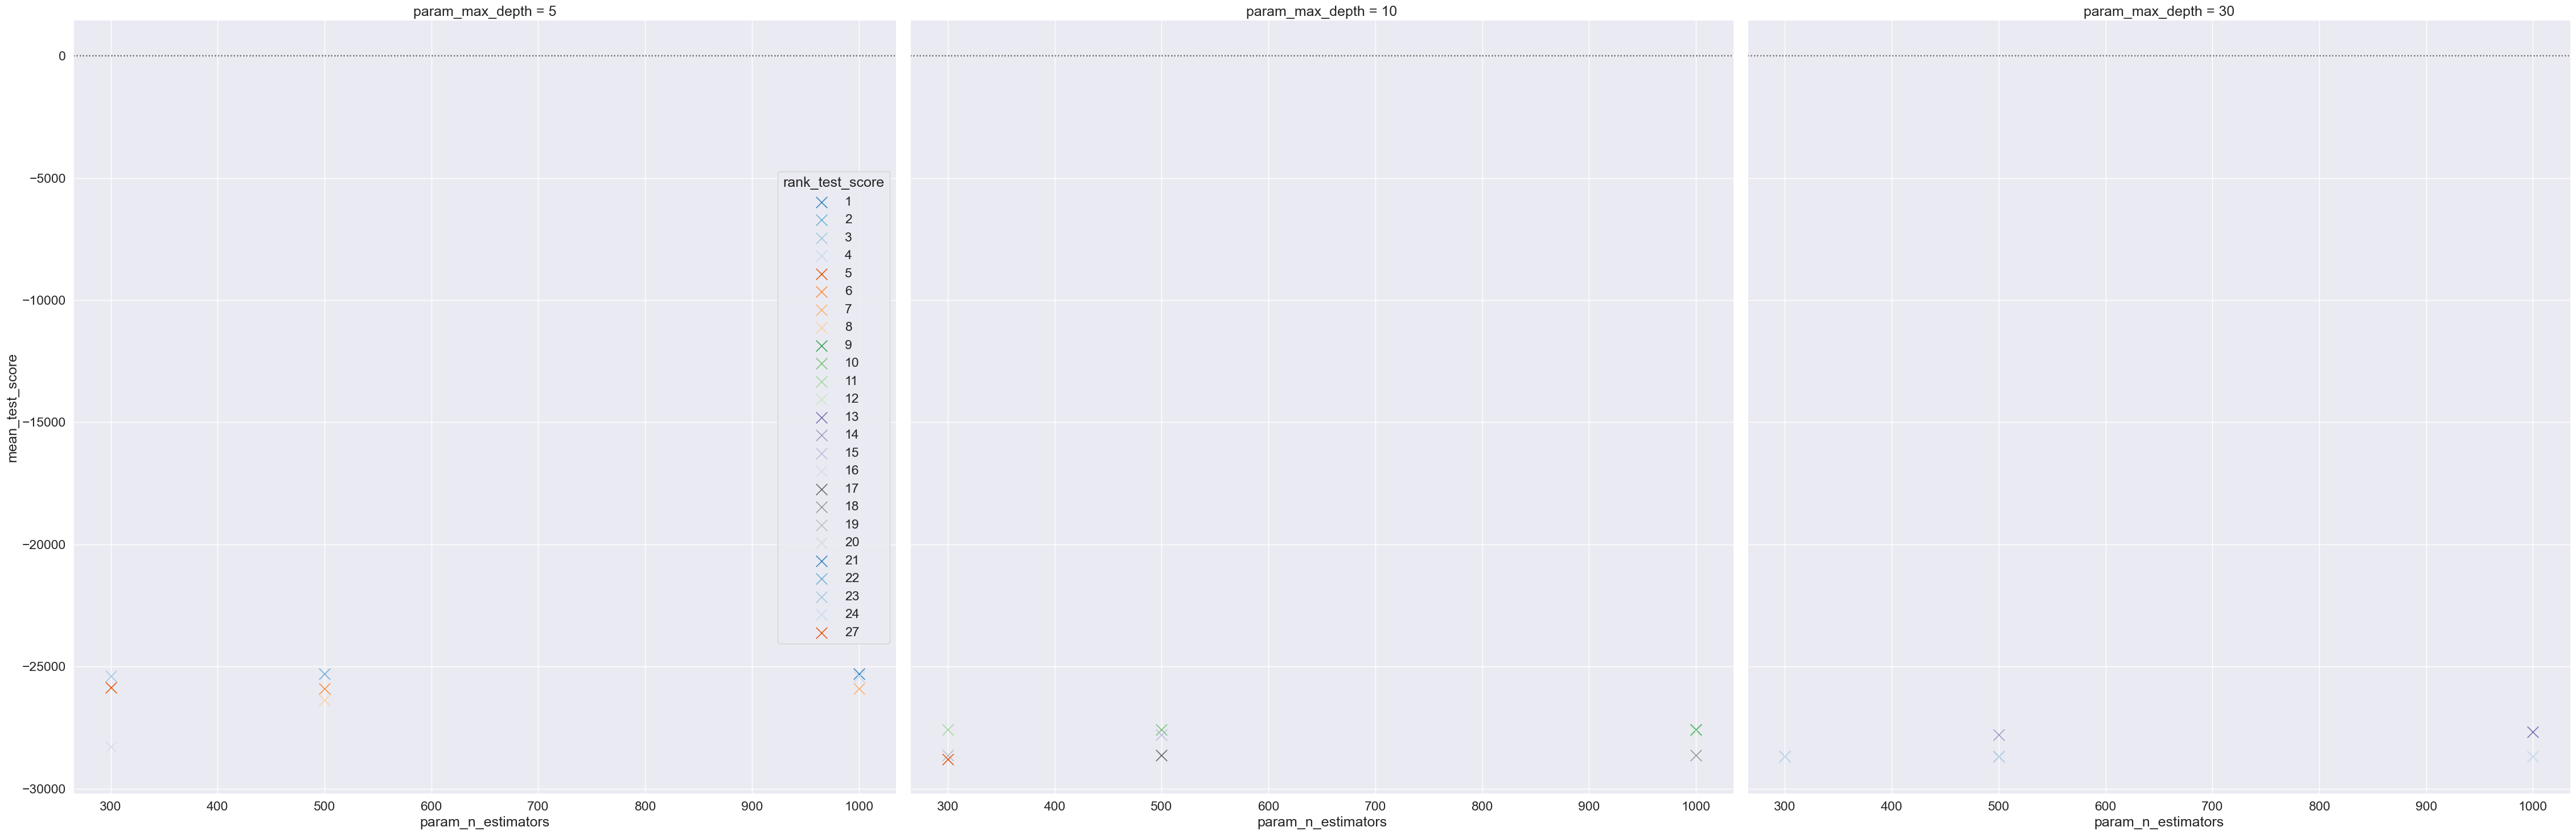

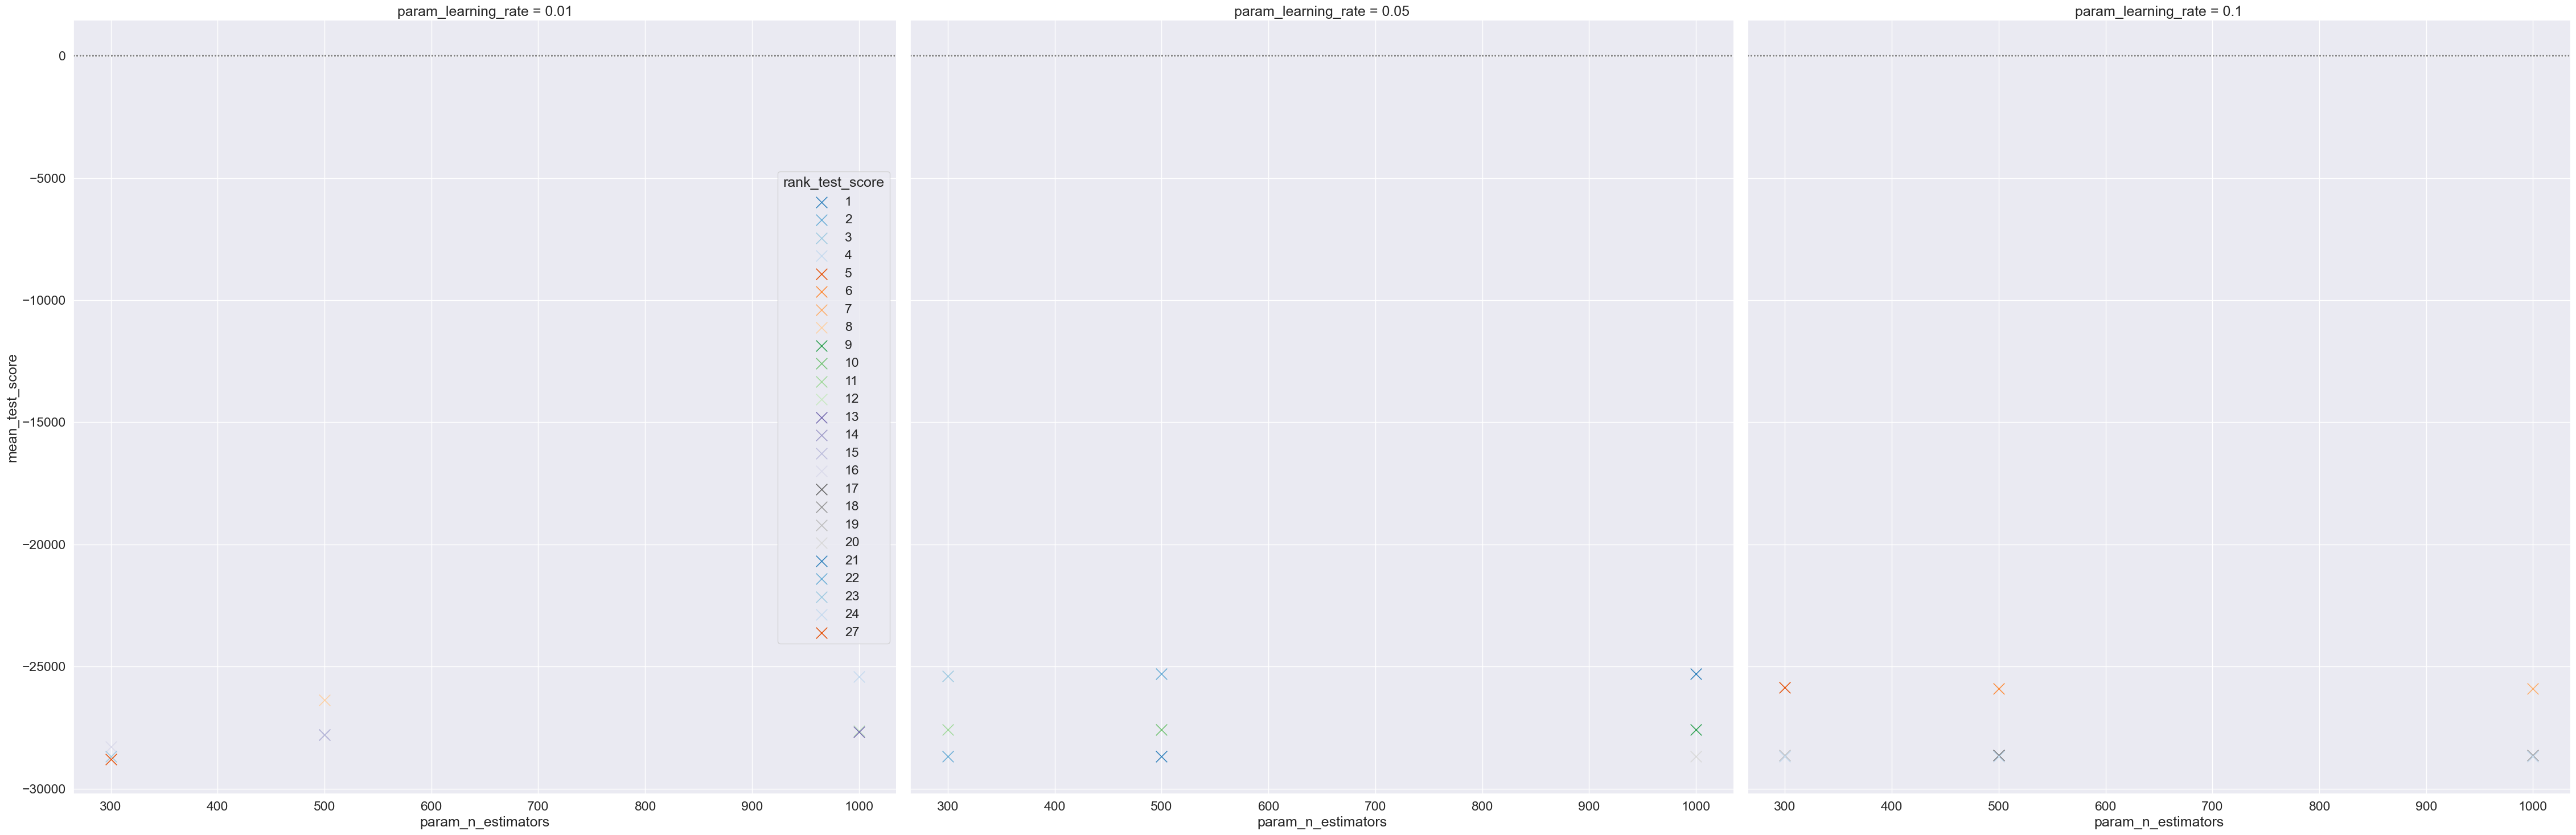

In [99]:
 #Gradient Boosting Regressor


# Set paramters for Grid Search CV
param_grid = {
    "n_estimators": [300, 500, 1000],
    "max_depth": [5, 10, 30],
    "learning_rate": [0.01, 0.05, 0.1],
}
gbr = GradientBoostingRegressor(random_state=0, max_features="sqrt")

grid_search = model_pipeline(gbr, param_grid, "neg_root_mean_squared_error")
plot_mean_scores(
    grid_search,
    ["param_max_depth", "param_learning_rate"],
    "param_n_estimators",
    "mean_test_score",
    "GradientBoosting",
)

In [100]:
grid_search.best_estimator_

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, max_features='sqrt',
                          n_estimators=1000, random_state=0)